# Practice Optimizing DataFrames and Processing in Chunks

## Introduction

In this project, our goal is to practice with chunked dataframes and optimize a dataframe's memory usage. 

Our data is financial lending data from a marketplace for personal loans that matches borrowers with investors, the [Lending club](https://www.lendingclub.com/). We'll work with a dataset of loans approved from 2007-1011. 

If we read in the entire dataset, it consumes about 67 megabytes of memory. Then, to reach our goal, we will imagine that we only have 10 megabytes of memory available.

## Overview of the Data

In [1]:
# First 5 rows
import pandas as pd
pd.options.display.max_columns = 99

five_rows = pd.read_csv('loans_2007.csv', nrows=5)
five_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [2]:
print('Number of columns: ', five_rows.shape[1])

Number of columns:  52


In [3]:
# First 1000 rows and memory usage in megabytes
thousand_rows = pd.read_csv('loans_2007.csv', nrows=1000)
memory_mb = thousand_rows.memory_usage(deep=True).sum() / (2**20)
print(memory_mb)

1.5502548217773438


We have 10 megabytes available, and a chunk of one thousand rows only consumes 1.5 megabytes. As a result, we can increase the number of rows until we are below 50% of our available memory, just to be safe.

In [4]:
# Three thousand rows usage in megabytes
three_thousand_rows = pd.read_csv('loans_2007.csv', nrows=3000)
memory_mb = three_thousand_rows.memory_usage(deep=True).sum()/(2**20)
print(memory_mb)

4.649059295654297


4.649059295654297
4.644805908203125
4.646563529968262
4.647915840148926
4.644108772277832
4.645991325378418
4.644582748413086
4.646951675415039
4.645077705383301
4.64512825012207
4.657840728759766
4.656707763671875
4.663515090942383
4.896956443786621
0.880854606628418


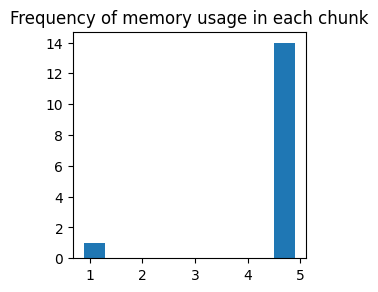

In [5]:
# Calculate each dataframe chunk's memory footprint
three_thousand_iter = pd.read_csv('loans_2007.csv', chunksize=3000)
memory_chunks = []
for chunk in three_thousand_iter:
    memory_chunk = chunk.memory_usage(deep=True).sum()/(2**20)
    print(memory_chunk)
    memory_chunks.append(memory_chunk)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [3, 3]

plt.hist(memory_chunks)
plt.title('Frequency of memory usage in each chunk')
plt.show()

We can conclude that all chunks are under our threshold of 5 megabytes.

## Exploring the Data in Chunks

Let's explore the columns to see which ones we can optimize.

In [6]:
# Calculate how many columns have a numeric/string type for each chunk
import numpy as np
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)
numeric_cols = []
string_cols = []
for chunk in chunks:
    numeric_columns = chunk.select_dtypes(include=[np.number]).shape[1]
    numeric_cols.append(numeric_columns)
    
    string_columns = chunk.select_dtypes(include=['object']).shape[1]
    string_cols.append(string_columns)
    
print(numeric_cols)
print(string_cols)

[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22]


In [7]:
# See if columns are consistent across chunks
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)
prev_str_cols = None
for chunk in chunks:
    str_cols = chunk.select_dtypes(include=['object']).columns.tolist()
    if prev_str_cols is None or str_cols != prev_str_cols:
        print(str_cols, '\n')
        prev_str_cols = str_cols.copy()

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 

['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 



Columns don't seem consistent across chunks since, in the last columns, the type of 'id' column were made string. That's why we see that difference in the number of string/numeric columns for each chunk.

The id column won't be useful for our analysis, then we'll ignore this column.

In [8]:
# Calculate how many unique values there are in each string column for each chunk
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)

uniques = {}
for chunk in chunks:
    string_col = chunk.select_dtypes(include=['object'])
    for col in string_col.columns:
        if col in uniques:
            uniques[col].append(string_col[col].value_counts())
        else:
            uniques[col] = [string_col[col].value_counts()]

In [9]:
# Calculate how many of the string columns have less than 50 unique values
uniques_combined = {}
less_50_unique = []
for col in uniques:
    concat_uniques = pd.concat(uniques[col])
    uniques_combined[col] = concat_uniques.groupby(concat_uniques.index).sum()
    
    if uniques_combined[col].shape[0] < 50:
        print(col, uniques_combined[col].shape[0])
        less_50_unique.append([[col, uniques_combined[col].shape[0]], [uniques_combined[col]]])

term 2
grade 7
sub_grade 35
emp_length 11
home_ownership 5
verification_status 3
loan_status 9
pymnt_plan 2
purpose 14
initial_list_status 1
application_type 1


In [10]:
# See which float columns have no missing valyes and could be candidates for conversion to int
chunks = pd.read_csv('loans_2007.csv', header=0, chunksize=3000)

missing = []
for chunk in chunks:
    floats = chunk.select_dtypes(include=['float']).columns.tolist()
    chunk_null = chunk.isnull().sum()
    chunk_null_float = chunk_null[floats]
    missing.append(chunk_null_float)
    
combined_missing = pd.concat(missing)
print(combined_missing.groupby(combined_missing.index).sum().sort_values())

member_id                        3
total_rec_int                    3
total_pymnt_inv                  3
total_pymnt                      3
revol_bal                        3
recoveries                       3
policy_code                      3
out_prncp_inv                    3
out_prncp                        3
total_rec_late_fee               3
loan_amnt                        3
last_pymnt_amnt                  3
total_rec_prncp                  3
funded_amnt_inv                  3
funded_amnt                      3
dti                              3
collection_recovery_fee          3
installment                      3
annual_inc                       7
inq_last_6mths                  32
total_acc                       32
delinq_2yrs                     32
pub_rec                         32
delinq_amnt                     32
open_acc                        32
acc_now_delinq                  32
tax_liens                      108
collections_12_mths_ex_med     148
chargeoff_within_12_

In [11]:
# Calculate the total memory usage across all chunks
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)
old_total_memory = 0
for chunk in chunks:
    old_total_memory += chunk.memory_usage(deep=True).sum()/(2**20)
    
old_total_memory

66.21605968475342

## Optimizing String Columns

We can achieve memory improvements by converting the columns to another type. Now, we will convert some of the columns to the category type and columns that contain numeric values to the float type.

In [12]:
# Name of the string columns
str_cols

['id',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [13]:
# Read three rows that all columns are string type
rows = pd.read_csv('loans_2007.csv', header = 0, nrows=3)
rows = rows[str_cols]
rows

,id,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,1077501,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,Jan-1985,83.7%,f,Jan-2015,Jun-2016,INDIVIDUAL
1,1077430,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,Apr-1999,9.4%,f,Apr-2013,Sep-2013,INDIVIDUAL
2,1077175,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,Nov-2001,98.5%,f,Jun-2014,Jun-2016,INDIVIDUAL


Useful columns for analysis:

In [14]:
useful_cols = ['term', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'revol_util', 'last_pymnt_d']

All of these useful columns are in the list created with the name of string columns that have less than 50 unique values. Thus we can convert the some of useful columns to category type.

In [15]:
less_50_unique

[[['term', 2],
  [ 36 months    31534
    60 months    11001
   Name: term, dtype: int64]],
 [['grade', 7],
  [A    10183
   B    12389
   C     8740
   D     6016
   E     3394
   F     1301
   G      512
   Name: grade, dtype: int64]],
 [['sub_grade', 35],
  [A1    1142
   A2    1520
   A3    1823
   A4    2905
   A5    2793
   B1    1882
   B2    2113
   B3    2997
   B4    2590
   B5    2807
   C1    2264
   C2    2157
   C3    1658
   C4    1370
   C5    1291
   D1    1053
   D2    1485
   D3    1322
   D4    1140
   D5    1016
   E1     884
   E2     791
   E3     668
   E4     552
   E5     499
   F1     392
   F2     308
   F3     236
   F4     211
   F5     154
   G1     141
   G2     107
   G3      79
   G4      99
   G5      86
   Name: sub_grade, dtype: int64]],
 [['emp_length', 11],
  [1 year       3595
   10+ years    9369
   2 years      4743
   3 years      4364
   4 years      3649
   5 years      3458
   6 years      2375
   7 years      1875
   8 years      1592
   9

Also, we can convert `term` and `revol_util` to `numerical` by data cleaning and convert `issue_d`, `earliest_cr_line`, `last_pymnt_d`, and `last_credit_pull_d` to datetime.

In [16]:
convert_cols = {"sub_grade": "category", 
               "home_ownership": "category", 
               "verification_status": "category", 
               "purpose": "category"}

dates = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [17]:
# Convert cols
chunks = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_cols, parse_dates=dates, header=0)

for chunk in chunks:
    clean_term = chunk['term'].str.replace('months','').str.strip()
    
    clean_revol = chunk['revol_util'].str.replace('%', '')
    
    chunk['term'] = clean_term.astype('float')
    chunk['term'] = pd.to_numeric(chunk['term'], downcast='float')

    chunk['revol_util'] = clean_revol.astype('float')
    chunk['revol_util'] = pd.to_numeric(chunk['revol_util'], downcast='float')
    
chunk.dtypes

id                                    object
member_id                            float64
loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                 float32
int_rate                              object
installment                          float64
grade                                 object
sub_grade                           category
emp_title                             object
emp_length                            object
home_ownership                      category
annual_inc                           float64
verification_status                 category
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                             category
title                                 object
zip_code                              object
addr_state                            object
dti       

In [18]:
# Calculate the new total memory usage across all chunks
chunks = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_cols, parse_dates=dates, header=0)
new_total_memory = 0

for chunk in chunks:
    clean_term = chunk['term'].str.replace('months','').str.strip()
    
    clean_revol = chunk['revol_util'].str.replace('%', '')
    
    chunk['term'] = clean_term.astype('float')
    chunk['term'] = pd.to_numeric(chunk['term'], downcast='float')

    chunk['revol_util'] = clean_revol.astype('float')
    chunk['revol_util'] = pd.to_numeric(chunk['revol_util'], downcast='float')
    
    new_total_memory += chunk.memory_usage(deep=True).sum() / (2**20)

print(f'First total memory usage: {old_total_memory:.2f} megabytes\nSecond total memory usage: {new_total_memory:.2f} megabytes')

First total memory usage: 66.22 megabytes
Second total memory usage: 41.74 megabytes


## Optimizing Numeric Columns

We can save more space converting float columns to a more efficient subtype. Besides, we can convert float columns that don't contain any missing values to an integer type if they represent whole numbers.

In [19]:
# Identify float columns with missing values

chunks = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_cols, parse_dates=dates, header=0)
missing = []

for chunk in chunks:
    clean_term = chunk['term'].str.replace('months','').str.strip()
    
    clean_revol = chunk['revol_util'].str.replace('%', '')
    
    chunk['term'] = clean_term.astype('float')
    chunk['term'] = pd.to_numeric(chunk['term'], downcast='float')

    chunk['revol_util'] = clean_revol.astype('float')
    chunk['revol_util'] = pd.to_numeric(chunk['revol_util'], downcast='float')
    
    chunk_null = chunk.isnull().sum()
    float_cols = chunk.select_dtypes(include=['float']).columns.tolist()
    missing.append(chunk_null[float_cols])
    
combined_missing = pd.concat(missing)
combined_missing = combined_missing.groupby(combined_missing.index).sum()

print('Float columns with missing values:\n\n', combined_missing, '\n')

print('All float column names without missing values:')
for col in float_cols:
    if col not in combined_missing:
        print(col)

Float columns with missing values:

 acc_now_delinq                  32
annual_inc                       7
chargeoff_within_12_mths       148
collection_recovery_fee          3
collections_12_mths_ex_med     148
delinq_2yrs                     32
delinq_amnt                     32
dti                              3
funded_amnt                      3
funded_amnt_inv                  3
inq_last_6mths                  32
installment                      3
last_pymnt_amnt                  3
loan_amnt                        3
member_id                        3
open_acc                        32
out_prncp                        3
out_prncp_inv                    3
policy_code                      3
pub_rec                         32
pub_rec_bankruptcies          1368
recoveries                       3
revol_bal                        3
tax_liens                      108
total_acc                       32
total_pymnt                      3
total_pymnt_inv                  3
total_rec_int     

We can see that we can't make any float columns in integers since all float columns have missing values.

In [20]:
# Convert float columns to an efficient subtype

chunks = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_cols, parse_dates=dates, header=0)
changed_subtype = {}

for chunk in chunks:
    clean_term = chunk['term'].str.replace('months','').str.strip()
    
    clean_revol = chunk['revol_util'].str.replace('%', '')
    
    chunk['term'] = clean_term.astype('float')
    chunk['term'] = pd.to_numeric(chunk['term'], downcast='float')

    chunk['revol_util'] = clean_revol.astype('float')
    chunk['revol_util'] = pd.to_numeric(chunk['revol_util'], downcast='float')
    
    float_cols = chunk.select_dtypes(include=['float']).columns.tolist()
    for col in float_cols:
        old_subtype = chunk[col].dtype
        chunk[col] = pd.to_numeric(chunk[col], downcast='float')
        new_subtype = chunk[col].dtype
        if old_subtype != new_subtype and col not in changed_subtype:
            changed_subtype[col] = 'Changed'
            
chunk[chunk.select_dtypes(include=['float'])].dtypes

id                                    object
member_id                            float32
loan_amnt                            float32
funded_amnt                          float32
funded_amnt_inv                      float32
term                                 float32
int_rate                              object
installment                          float32
grade                                 object
sub_grade                           category
emp_title                             object
emp_length                            object
home_ownership                      category
annual_inc                           float32
verification_status                 category
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                             category
title                                 object
zip_code                              object
addr_state                            object
dti       

In [21]:
changed_subtype

{'member_id': 'Changed',
 'loan_amnt': 'Changed',
 'funded_amnt': 'Changed',
 'funded_amnt_inv': 'Changed',
 'installment': 'Changed',
 'annual_inc': 'Changed',
 'dti': 'Changed',
 'delinq_2yrs': 'Changed',
 'inq_last_6mths': 'Changed',
 'open_acc': 'Changed',
 'pub_rec': 'Changed',
 'revol_bal': 'Changed',
 'total_acc': 'Changed',
 'out_prncp': 'Changed',
 'out_prncp_inv': 'Changed',
 'total_pymnt': 'Changed',
 'total_pymnt_inv': 'Changed',
 'total_rec_prncp': 'Changed',
 'total_rec_int': 'Changed',
 'total_rec_late_fee': 'Changed',
 'recoveries': 'Changed',
 'collection_recovery_fee': 'Changed',
 'last_pymnt_amnt': 'Changed',
 'collections_12_mths_ex_med': 'Changed',
 'policy_code': 'Changed',
 'acc_now_delinq': 'Changed',
 'chargeoff_within_12_mths': 'Changed',
 'delinq_amnt': 'Changed',
 'pub_rec_bankruptcies': 'Changed',
 'tax_liens': 'Changed'}

We can see that, if we could, we converted all columns with subtype float64 to float32 to find more space efficiency for the columns.

In [22]:
# Calculate the last total memory usage across all chunks
chunks = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_cols, parse_dates=dates, header=0)
last_total_memory = 0

for chunk in chunks:
    clean_term = chunk['term'].str.replace('months','').str.strip()
    
    clean_revol = chunk['revol_util'].str.replace('%', '')
    
    chunk['term'] = clean_term.astype('float')
    chunk['term'] = pd.to_numeric(chunk['term'], downcast='float')

    chunk['revol_util'] = clean_revol.astype('float')
    chunk['revol_util'] = pd.to_numeric(chunk['revol_util'], downcast='float')
    
    float_cols = chunk.select_dtypes(include=['float']).columns.tolist()
    for col in float_cols:
        old_subtype = chunk[col].dtype
        chunk[col] = pd.to_numeric(chunk[col], downcast='float')
    
    last_total_memory += chunk.memory_usage(deep=True).sum() / (2**20)

print(f'First total memory usage: {old_total_memory:.2f} megabytes')
print(f'Second total memory usage: {new_total_memory:.2f} megabytes')
print(f'Last total memory usage: {last_total_memory:.2f} megabytes')

First total memory usage: 66.22 megabytes
Second total memory usage: 41.74 megabytes
Last total memory usage: 36.87 megabytes


## Conclusion

In this project, our goal was to work with chunked dataframes and optimize a dataframe's memory usage with input data that would consume approximately 67 megabytes of memory. 

Summing up, we achieved our aim given that we reduced almost 30 megabytes of memory usage using chunks and converting column types.